In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [2]:
propiedadesTrain = pd.read_csv('train.csv')
propiedadesTest = pd.read_csv('test.csv')
featuresTrain = pd.read_csv('featuresTrain.csv')
featuresTest = pd.read_csv('featuresTest.csv')

# En este notebook voy a transformar los features numericos para mejorar el modelo:

In [3]:
#primero vamos a ver que valores son frecuentes para las columnas con valores numericos:
featuresTrain.columns

Index(['id', 'tipodepropiedad', 'ciudad', 'provincia', 'antiguedad',
       'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales',
       'idzona', 'lat', 'lng', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio', 'anio',
       'mes', 'dia', 'datoBienCargado', 'peso_IDF_descripcion',
       'peso_IDF_titulo'],
      dtype='object')

# primero voy a graficar un histograma para las columnas 'antiguedad','habitaciones','banos','metroscubiertos','metroscubiertos' y 'metrosdescubiertos' para ver cuales tiene una distribucion exponencial :

/home/alfonso/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alfonso/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribucion de metroscubiertos')

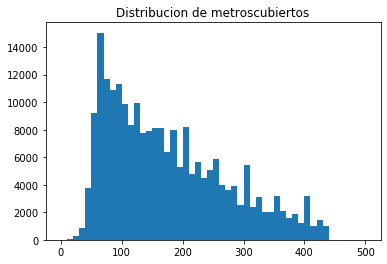

In [4]:
plt.hist(featuresTrain['metroscubiertos'], range=(0, 500), bins=50)
plt.title('Distribucion de metroscubiertos')
#como se puede ver metros cubiertos tiene distribucion exponencial

Text(0.5, 1.0, 'Distribucion de metrostotales')

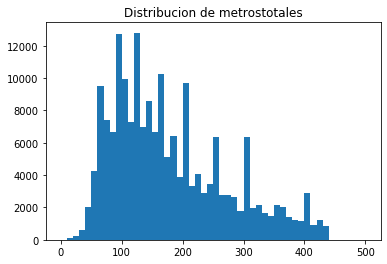

In [5]:
plt.hist(featuresTrain['metrostotales'], range=(0, 500), bins=50)
plt.title('Distribucion de metrostotales')
#como se puede ver metros totales tiene distribucion exponencial

Text(0.5, 1.0, 'Distribucion de metrosdescubiertos')

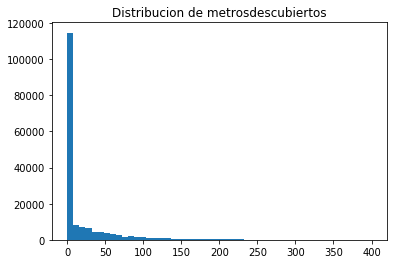

In [6]:
# voy a crear la columna 'metrosdescubiertos', la cual es la resta entre 'metrostotales' y 'metrosdescubiertos':
featuresTrain['metrosdescubiertos'] = featuresTrain['metrostotales'] - featuresTrain['metroscubiertos']
featuresTrain.loc[featuresTrain['metrosdescubiertos'] < 0,'metrosdescubiertos'] = 0

plt.hist(featuresTrain['metrosdescubiertos'], range=(0, 400), bins=50)
plt.title('Distribucion de metrosdescubiertos')
#como se puede ver metros descubiertos tiene distribucion exponencial

Text(0.5, 1.0, 'Distribucion de antiguedad')

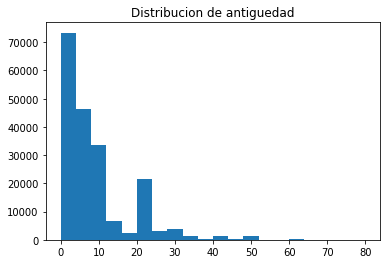

In [7]:
plt.hist(featuresTrain['antiguedad'], range=(0, 80), bins=20)
plt.title('Distribucion de antiguedad')
#como se puede ver antiguedad tiene distribucion exponencial

Text(0.5, 1.0, 'Distribucion de baños')

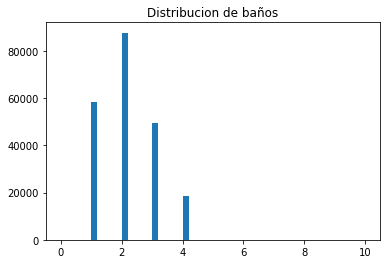

In [8]:
plt.hist(featuresTrain['banos'], range=(0, 10), bins=50)
plt.title('Distribucion de baños')
#baños no tiene distribucion exponencial:

Text(0.5, 1.0, 'Distribucion de habitaciones')

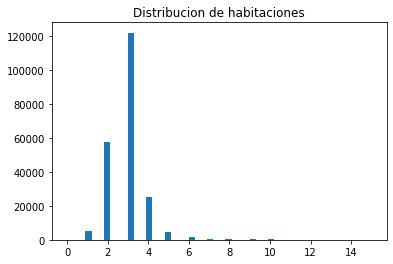

In [9]:
plt.hist(featuresTrain['habitaciones'], range=(0, 15), bins=50)
plt.title('Distribucion de habitaciones')
#habitaciones no tiene distribucion exponencial:

Text(0.5, 1.0, 'Distribucion de garages')

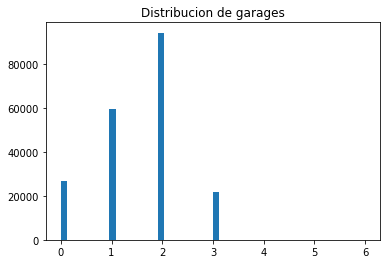

In [10]:
plt.hist(featuresTrain['garages'], range=(0, 6), bins=50)
plt.title('Distribucion de garages')
#garages no tiene distribucion exponencial:

# Antes de seguir voy a asignar a los nulls de algunas columnas un valor usando un imputer, o sea que le asigno al null da dicha columna el un valor que en este caso es el promedio(para el set de entrenamiento y el de test):

In [11]:
imp = SimpleImputer()

In [12]:
featuresTest['metrosdescubiertos'] = featuresTest['metrostotales'] - featuresTest['metroscubiertos']
featuresTest.loc[featuresTest['metrosdescubiertos'] < 0,'metrosdescubiertos'] = 0

In [13]:
featuresTrain['metroscubiertos'] = imp.fit_transform(featuresTrain[['metroscubiertos']])
featuresTest['metroscubiertos'] = imp.transform(featuresTest[['metroscubiertos']])
featuresTrain['metrosdescubiertos'] = imp.fit_transform(featuresTrain[['metrosdescubiertos']])
featuresTest['metrosdescubiertos'] = imp.transform(featuresTest[['metrosdescubiertos']])
featuresTrain['metrostotales'] = imp.fit_transform(featuresTrain[['metrostotales']])
featuresTest['metrostotales'] = imp.transform(featuresTest[['metrostotales']])
featuresTrain['antiguedad'] = imp.fit_transform(featuresTrain[['antiguedad']])
featuresTest['antiguedad'] = imp.transform(featuresTest[['antiguedad']])
featuresTrain['idzona'] = imp.fit_transform(featuresTrain[['idzona']])
featuresTest['idzona'] = imp.transform(featuresTest[['idzona']])
featuresTrain['lat'] = imp.fit_transform(featuresTrain[['lat']])
featuresTest['lat'] = imp.transform(featuresTest[['lat']])
featuresTrain['lng'] = imp.fit_transform(featuresTrain[['lng']])
featuresTest['lng'] = imp.transform(featuresTest[['lng']])
featuresTrain['anio'] = imp.fit_transform(featuresTrain[['anio']])
featuresTest['anio'] = imp.transform(featuresTest[['anio']])
featuresTrain['mes'] = imp.fit_transform(featuresTrain[['mes']])
featuresTest['mes'] = imp.transform(featuresTest[['mes']])
featuresTrain['dia'] = imp.fit_transform(featuresTrain[['dia']])
featuresTest['dia'] = imp.transform(featuresTest[['dia']])
featuresTrain['garages'] = imp.fit_transform(featuresTrain[['garages']])
featuresTest['garages'] = imp.transform(featuresTest[['garages']])
featuresTrain['banos'] = imp.fit_transform(featuresTrain[['banos']])
featuresTest['banos'] = imp.transform(featuresTest[['banos']])

In [14]:
# para el resto de los nulls les asigno -1:
featuresTrain = featuresTrain.fillna(-1)

In [15]:
# con esto ya no hay mas nulls
featuresTrain.isnull().sum()

id                            0
tipodepropiedad               0
ciudad                        0
provincia                     0
antiguedad                    0
habitaciones                  0
garages                       0
banos                         0
metroscubiertos               0
metrostotales                 0
idzona                        0
lat                           0
lng                           0
gimnasio                      0
usosmultiples                 0
piscina                       0
escuelascercanas              0
centroscomercialescercanos    0
precio                        0
anio                          0
mes                           0
dia                           0
datoBienCargado               0
peso_IDF_descripcion          0
peso_IDF_titulo               0
metrosdescubiertos            0
dtype: int64

# ahora aplico el logaritmo a 'antiguedad','metrostotales','metroscubiertos' y 'metrosdescubiertos':

In [16]:
featuresTrain['antiguedad'] = featuresTrain['antiguedad'] +1
featuresTrain['metroscubiertos'] = featuresTrain['metroscubiertos'] +1
featuresTrain['metrosdescubiertos']= featuresTrain['metrosdescubiertos'] +1
featuresTrain['metrostotales'] = featuresTrain['metrostotales']+1

In [17]:
featuresTrain['antiguedad'] = np.log(featuresTrain['antiguedad'])
featuresTrain['metroscubiertos'] = np.log(featuresTrain['metroscubiertos'])
featuresTrain['metrosdescubiertos']= np.log(featuresTrain['metrosdescubiertos'])
featuresTrain['metrostotales'] = np.log(featuresTrain['metrostotales'])

# reviso si las columnas tienen distribucion normal:

Text(0.5, 1.0, 'Distribucion de metrosdescubiertos')

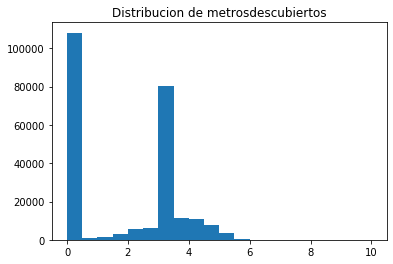

In [18]:
plt.hist(featuresTrain['metrosdescubiertos'], range=(0, 10), bins=20)
plt.title('Distribucion de metrosdescubiertos')
#como se puede ver metros descubiertos tiene distribucion normal:

Text(0.5, 1.0, 'Distribucion de metrostotales')

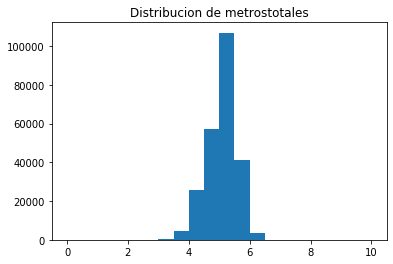

In [19]:
plt.hist(featuresTrain['metrostotales'], range=(0, 10), bins=20)
plt.title('Distribucion de metrostotales')
#como se puede ver metros totales tiene distribucion normal

Text(0.5, 1.0, 'Distribucion de metroscubiertos')

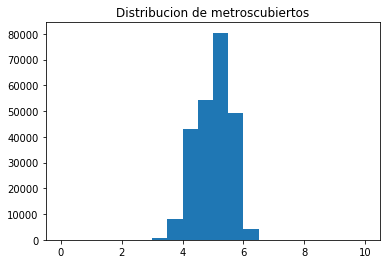

In [20]:
plt.hist(featuresTrain['metroscubiertos'], range=(0, 10), bins=20)
plt.title('Distribucion de metroscubiertos')
#como se puede ver metros cubiertos tiene distribucion normal:

Text(0.5, 1.0, 'Distribucion de antiguedad')

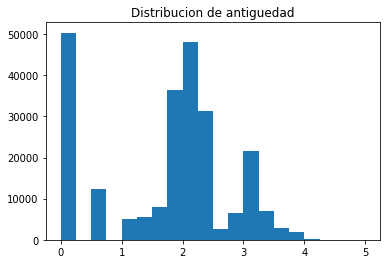

In [21]:
plt.hist(featuresTrain['antiguedad'], range=(0, 5), bins=20)
plt.title('Distribucion de antiguedad')
#como se puede ver antiguedad tiene distribucion exponencial

In [22]:
# featuresTrain tiene la forma:
featuresTrain.head()

,id,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,...,escuelascercanas,centroscomercialescercanos,precio,anio,mes,dia,datoBienCargado,peso_IDF_descripcion,peso_IDF_titulo,metrosdescubiertos
0,254099,Apartamento,Benito Juárez,Distrito Federal,2.210044,2.0,1.0,2.0,4.394449,4.394449,...,0.0,0.0,2273000.0,2015.0,8.0,23.0,1,0.086408,0.000000,0.000000
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,2.397895,3.0,2.0,2.0,5.594711,5.198497,...,1.0,1.0,3600000.0,2013.0,6.0,28.0,0,0.344349,0.165371,0.000000
2,247984,Casa,Tonalá,Jalisco,1.791759,3.0,2.0,2.0,4.976734,5.117994,...,0.0,0.0,1200000.0,2015.0,10.0,17.0,1,0.992218,0.033601,3.135494
3,209067,Casa,Zinacantepec,Edo. de México,0.693147,2.0,1.0,1.0,4.158883,4.219508,...,1.0,1.0,650000.0,2012.0,3.0,9.0,1,0.107927,0.033601,1.609438
4,185997,Apartamento,Zapopan,Jalisco,2.397895,2.0,1.0,1.0,4.564348,4.564348,...,0.0,0.0,1150000.0,2016.0,6.0,7.0,1,0.078086,0.000000,0.000000


# repito todos esos procedimientos para el set de entrenamiento:

In [23]:
featuresTest = featuresTest.fillna(-1)

In [24]:
featuresTest['antiguedad'] = featuresTest['antiguedad'] +1
featuresTest['metroscubiertos'] = featuresTest['metroscubiertos'] +1
featuresTest['metrosdescubiertos']= featuresTest['metrosdescubiertos'] +1
featuresTest['metrostotales'] = featuresTest['metrostotales']+1

In [25]:
featuresTest['antiguedad'] = np.log(featuresTest['antiguedad'])
featuresTest['metroscubiertos'] = np.log(featuresTest['metroscubiertos'])
featuresTest['metrosdescubiertos']= np.log(featuresTest['metrosdescubiertos'])
featuresTest['metrostotales'] = np.log(featuresTest['metrostotales'])

In [26]:
featuresTest.to_csv('featuresTest2.csv',index=False)
featuresTrain.to_csv('featuresTrain2.csv',index=False)